# Lead Scoring Case Study

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


In [1]:
# Suppressing Warnings

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing all necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#importing the dataset

lead_df=pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# Let's check the dimensions of the dataframe
lead_df.shape

(9240, 37)

In [5]:
# let's look at the statistical aspects of the dataframe

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# Let's see the type of each column

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data preparation

In [7]:
#finding any duplicates in the data and ropping those rows (if any)

lead_df.drop_duplicates(subset=None, inplace=True)

In [8]:
lead_df.shape

(9240, 37)

Since numbers of rows are same after removing duplicates, we can conclude that there were no duplicates

###### Finding columns having level 'Select'

In [9]:
select_col=list(lead_df.columns)
for i in select_col:
    if 'Select' in lead_df[i].values:
        print(i)

Specialization
How did you hear about X Education
Lead Profile
City


For these columns: "Specialization, How did you hear about X Education, Lead Profile, City" the lead might not have entered any option, hence Select is present here. It is equivalent to a null value and hence we can replace it with NaN values

In [10]:
lead_df = lead_df.replace("Select", np.nan)

In [11]:
#again checking if any Select values are there
select_col=list(lead_df.columns)
for i in select_col:
    if 'Select' in lead_df[i].values:
        print(i)

### Checking for null/ missing values

In [12]:
# Check the number of missing values in each column
lead_df.isnull().mean()*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [13]:
# missing columns with values > 30%
missing_col=lead_df.columns[(lead_df.isnull().mean())*100>30]
print(missing_col)

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')


In [14]:
# creating a copy of original dataframe before dropping the columns so as to preserve our original dataframe
lead_df1=lead_df.copy()
lead_df1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [15]:
# dropping those missing columns with values > 30%

lead_df1=lead_df1.drop(missing_col, axis=1)
lead_df1.shape

(9240, 27)

In [16]:
#checking the dataframe again for null values

lead_df1.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

We can drop Prospect ID & Lead Number since they will not add value to the model

There are 4 columns with < 1.5% missing values. We can drop those rows.

There are 3 columns with most null values in our dataframe: "Country, What is your current occupation, What matters most to you in choosing a course". Let's look at the columns to see which ones to keep and which ones to eliminate

In [17]:
# checking the values for "Country" column

lead_df1.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:
#dropping the column

lead_df1=lead_df1.drop("Country", axis=1)

From the above code we can see that India has the highest values so we can impute null values with India. But after replacing it, more than 95% of the values will be India which will make our analysis skewed. Hence it is better to drop this column.

In [19]:
# checking the values for "What is your current occupation" column

lead_df1["What is your current occupation"].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

We see that 'Unemployed' count is highest but we will impute missing values with 'Other' considering we do not know current occupation of lead. So we will create a separate category called 'Other'.

In [20]:
lead_df1["What is your current occupation"] = lead_df1["What is your current occupation"].replace(np.nan, 'Others')

In [21]:
#checking the values now
lead_df1["What is your current occupation"].value_counts()

Unemployed              5600
Others                  2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:
# checking the values for "What matters most to you in choosing a course" column 
lead_df1["What matters most to you in choosing a course"].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

There are only 3 values and out of these 3, one will make our results skewed. Hence, it is better to drop this column.

In [23]:
#dropping the column

lead_df1=lead_df1.drop("What matters most to you in choosing a course", axis=1)

In [24]:
#checking values for other variables
lead_df1["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Above we can Google and google been written as separate. Let's combine these 2

In [25]:
#To correct spelling error
lead_df1["Lead Source"] = lead_df1["Lead Source"].replace(["google"], "Google")

In [26]:
#imputing the null values in Lead Source with Google
lead_df1['Lead Source'].fillna('Google',inplace=True)
lead_df1["Lead Source"].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [27]:
lead_df1["Last Activity"].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [28]:
#imputing the null values in Last Activity with Email Opened
lead_df1["Last Activity"].fillna("Email Opened",inplace=True)
lead_df1["Last Activity"].value_counts()

Email Opened                    3540
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

Since Prospect ID, Lead Number will not add value to our model, we will drop these

In [29]:
#dropping the columns
cols_to_drop=["Prospect ID", "Lead Number"]

lead_df1=lead_df1.drop(cols_to_drop, axis=1)
lead_df1.shape

(9240, 23)

In [30]:
lead_df1.isnull().sum()

Lead Origin                                   0
Lead Source                                   0
Do Not Email                                  0
Do Not Call                                   0
Converted                                     0
TotalVisits                                 137
Total Time Spent on Website                   0
Page Views Per Visit                        137
Last Activity                                 0
What is your current occupation               0
Search                                        0
Magazine                                      0
Newspaper Article                             0
X Education Forums                            0
Newspaper                                     0
Digital Advertisement                         0
Through Recommendations                       0
Receive More Updates About Our Courses        0
Update me on Supply Chain Content             0
Get updates on DM Content                     0
I agree to pay the amount through cheque

The count null values of TotalVisits and Page Views Per Visit is very less hence it's better to drop these rows.

In [31]:
# To drop the rows containing missing values
lead_df1.dropna(inplace = True)

In [32]:
lead_df1.shape

(9103, 23)

In [33]:
lead_df1["Last Notable Activity"].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: Last Notable Activity, dtype: int64

### Checking for data imbalance

In [34]:
lead_df1["Do Not Call"].value_counts()

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [35]:
lead_df1["Do Not Email"].value_counts()

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [36]:
lead_df1["Search"].value_counts()

No     9089
Yes      14
Name: Search, dtype: int64

In [37]:
lead_df1["Magazine"].value_counts()

No    9103
Name: Magazine, dtype: int64

In [38]:
lead_df1["Newspaper Article"].value_counts()

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [39]:
lead_df1["X Education Forums"].value_counts() 

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [40]:
lead_df1["Digital Advertisement"].value_counts()

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [41]:
lead_df1["Newspaper"].value_counts()

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [42]:
lead_df1["Through Recommendations"].value_counts()

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [43]:
lead_df1["Receive More Updates About Our Courses"].value_counts()

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [44]:
lead_df1["Update me on Supply Chain Content"].value_counts()

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [45]:
lead_df1["Get updates on DM Content"].value_counts()

No    9103
Name: Get updates on DM Content, dtype: int64

In [46]:
lead_df1["I agree to pay the amount through cheque"].value_counts()

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [47]:
lead_df1["A free copy of Mastering The Interview"].value_counts()

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [48]:
# Dropping variables which are having imbalanced data

lead_df1.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'],1,inplace=True)

In [49]:
#checking the shape of dataframe after dropping columns
lead_df1.shape

(9103, 11)

In [50]:
#checking the header of dataframe after dropping columns
lead_df1.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Unemployed,No,Modified


In [51]:
lead_df1.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## Data Visualisation

In [52]:
cat_cols=['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
           'A free copy of Mastering The Interview', 'Last Notable Activity']

In [53]:
cont_cols=['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [54]:
taget=["Converted"]

### Univariate Analysis

In [55]:
# Data Imbalance
lead_df1.Converted.value_counts()

0    5642
1    3461
Name: Converted, dtype: int64

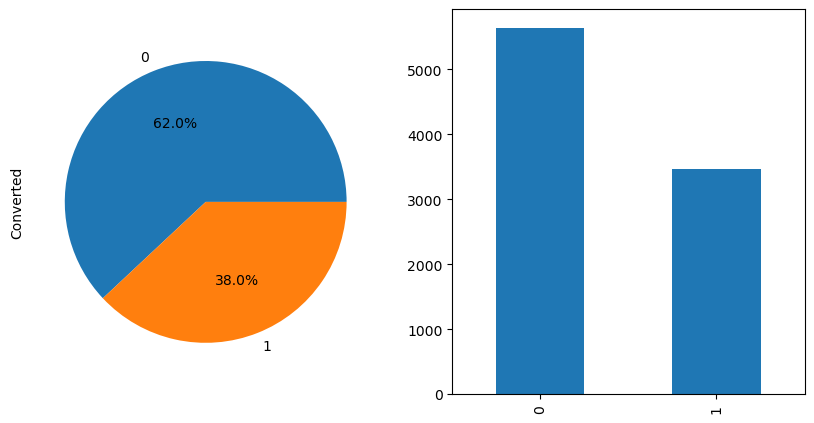

In [56]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
lead_df1.Converted.value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
lead_df1.Converted.value_counts().plot.bar()
plt.show()

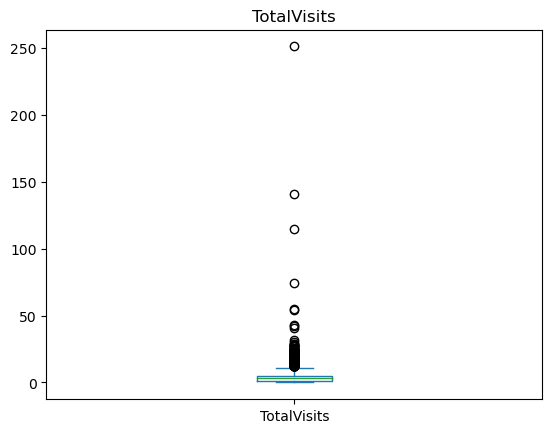

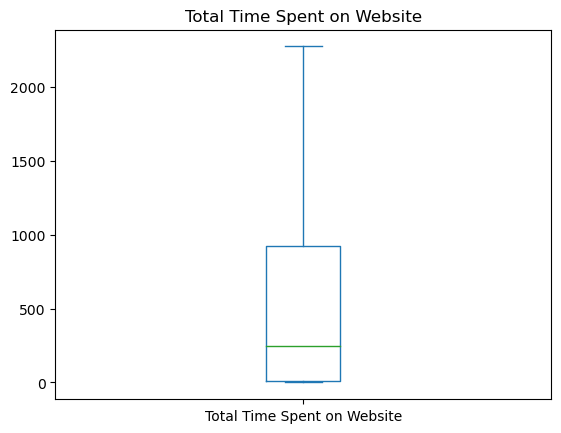

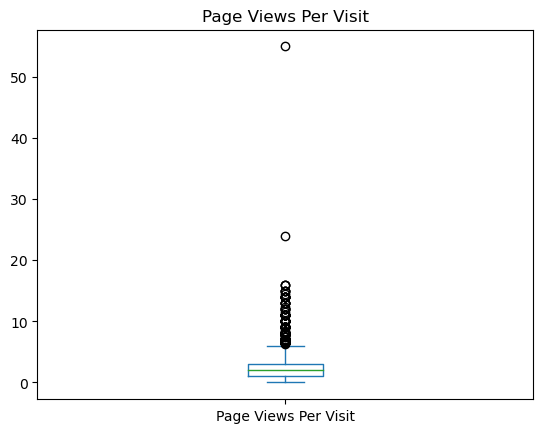

In [57]:
# plotting loops for univariate analysis for continuous variables
for cols in cont_cols:
    lead_df1[cols].plot.box()
    #sns.histplot(lead_df1[cols])
    plt.title(cols)
    #plt.xticks(rotation=90)
    plt.show()

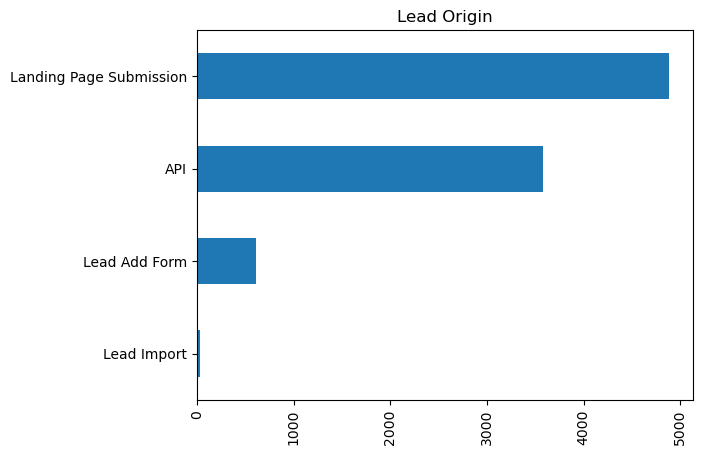

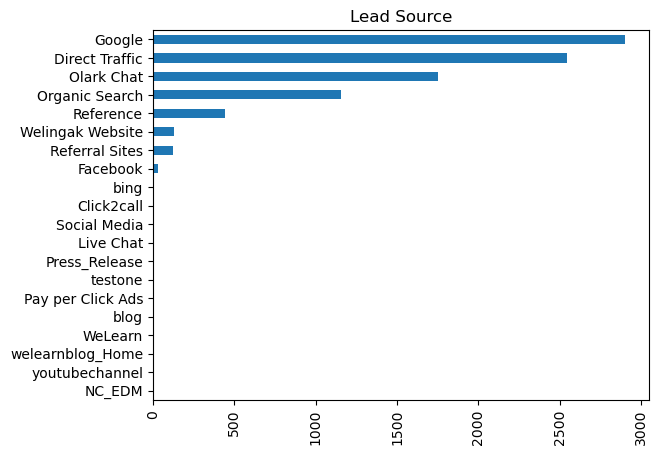

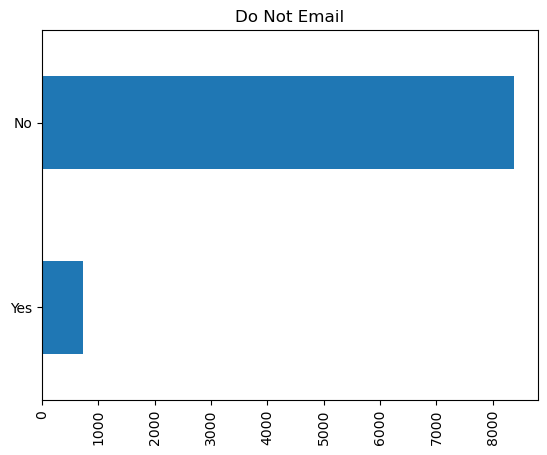

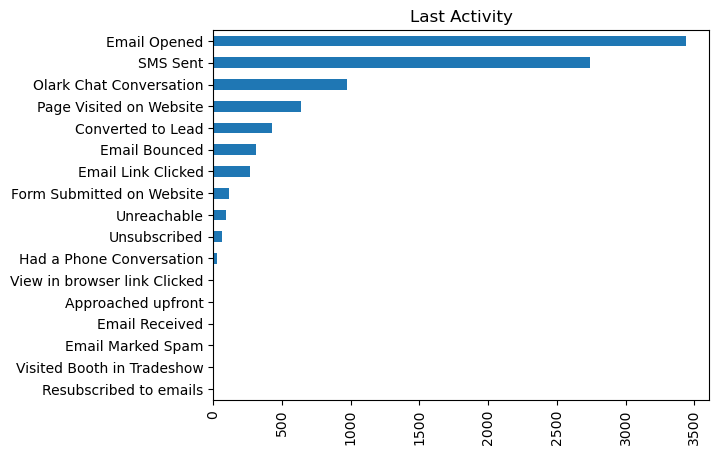

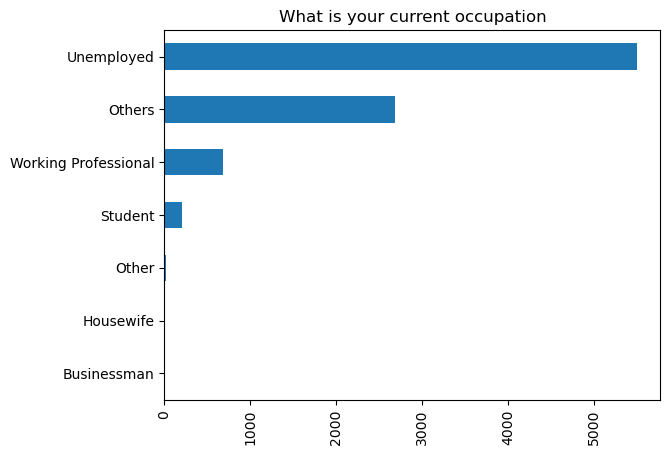

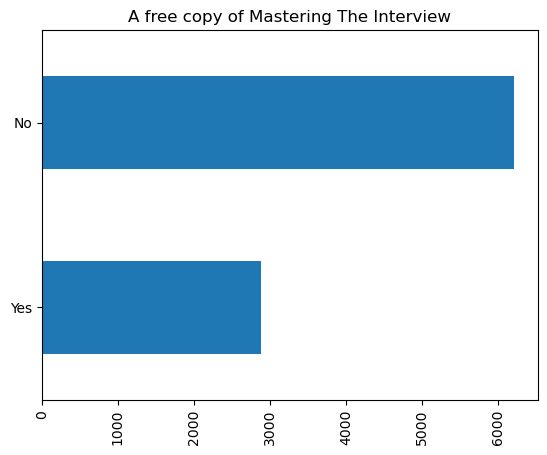

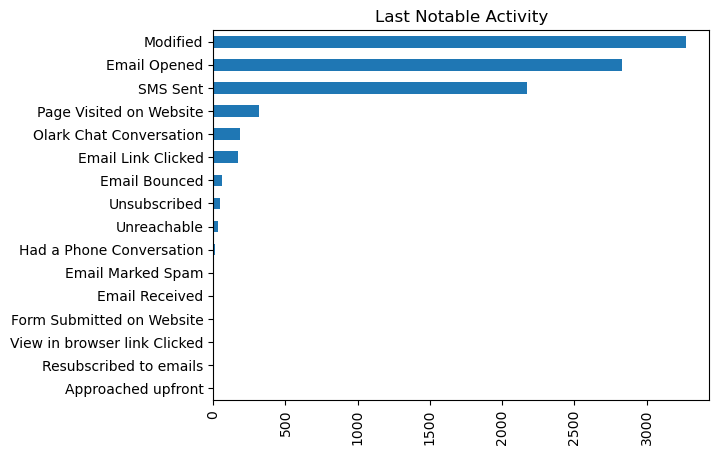

In [58]:
# plotting loops for univariate analysis for categorical variables
for cols in cat_cols:
    lead_df1[cols].value_counts().sort_values(ascending=True).plot.barh()
    plt.title(cols)
    plt.xticks(rotation=90)
    plt.show()

## Bivariate Analysis

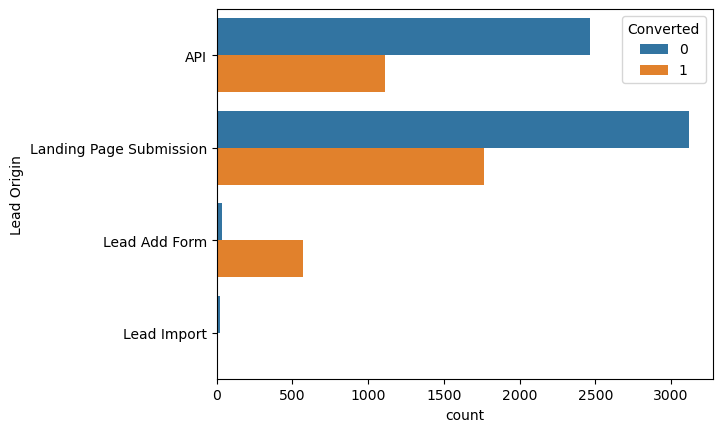

In [59]:
sns.countplot(y=lead_df1['Lead Origin'],hue=lead_df1.Converted)
plt.show()

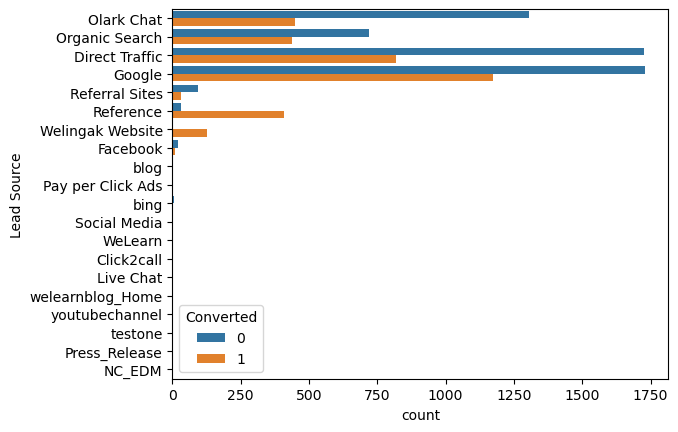

In [60]:
sns.countplot(y=lead_df1['Lead Source'],hue=lead_df1.Converted)
plt.show()

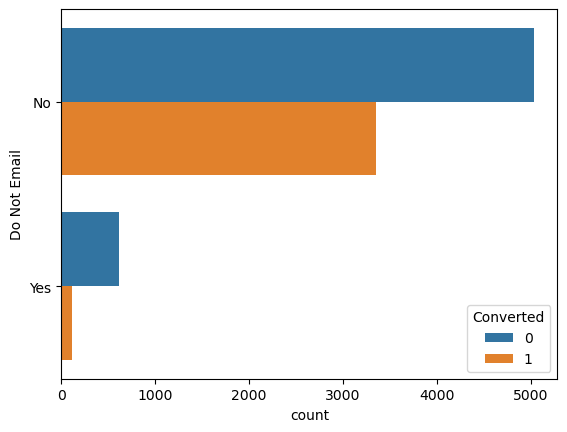

In [61]:
sns.countplot(y=lead_df1['Do Not Email'],hue=lead_df1.Converted)
plt.show()

        'Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'

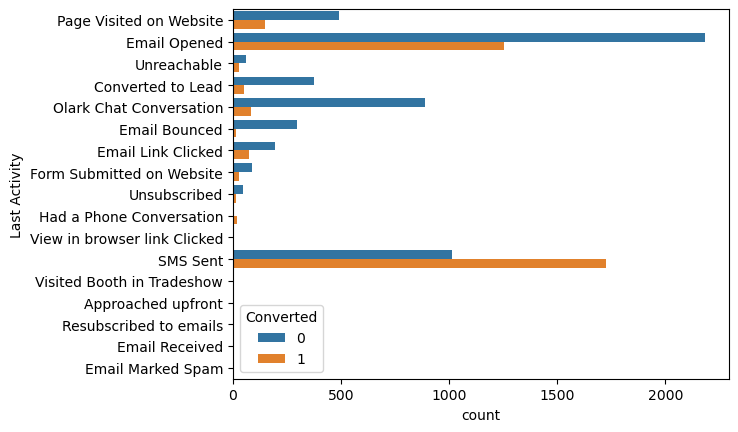

In [62]:
sns.countplot(y=lead_df1['Last Activity'],hue=lead_df1.Converted)
plt.show()

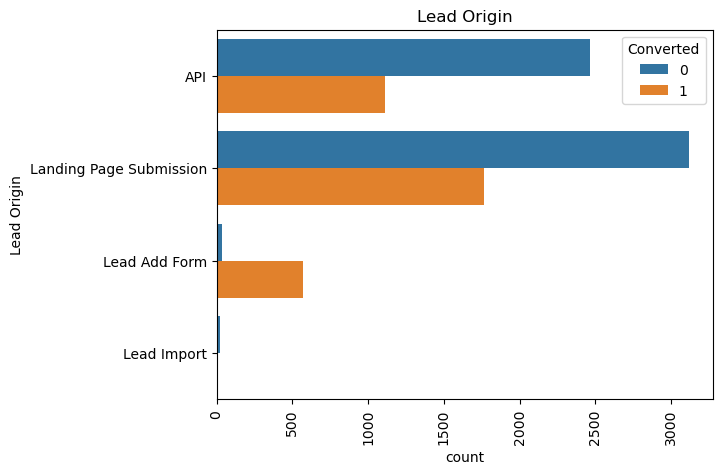

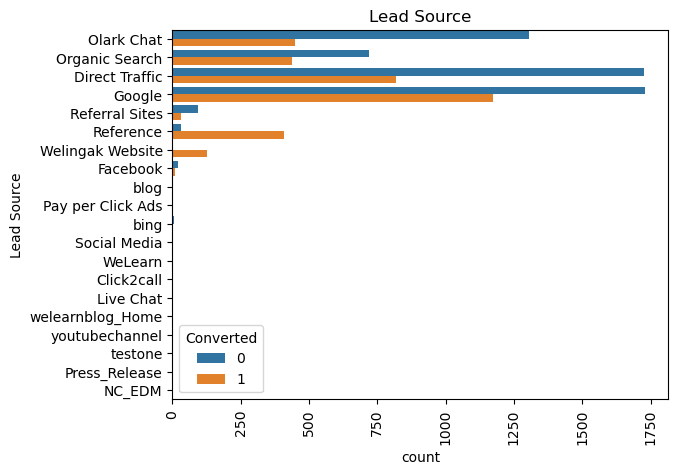

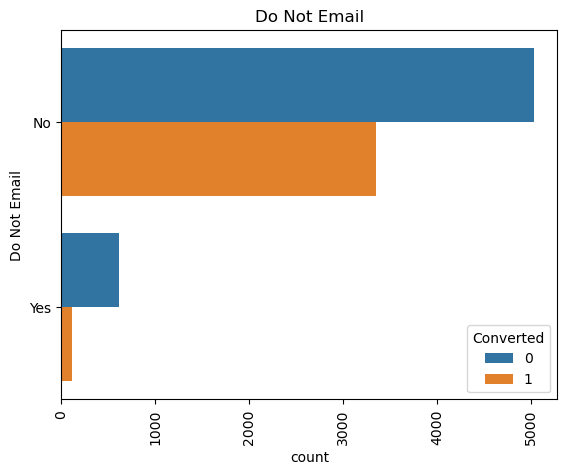

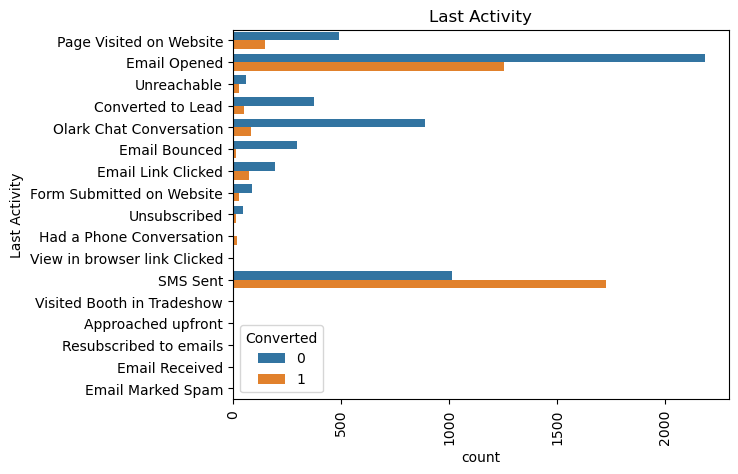

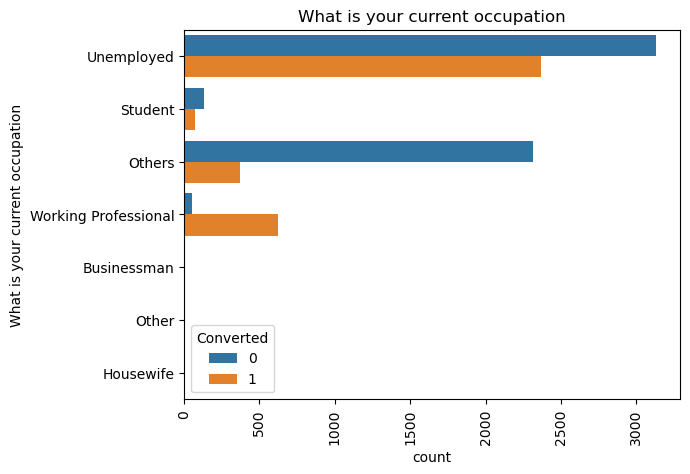

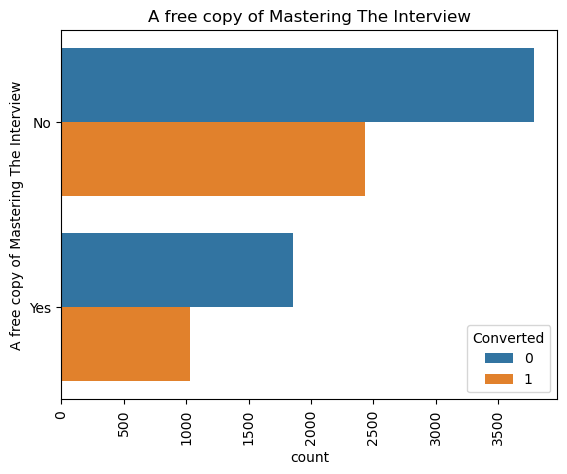

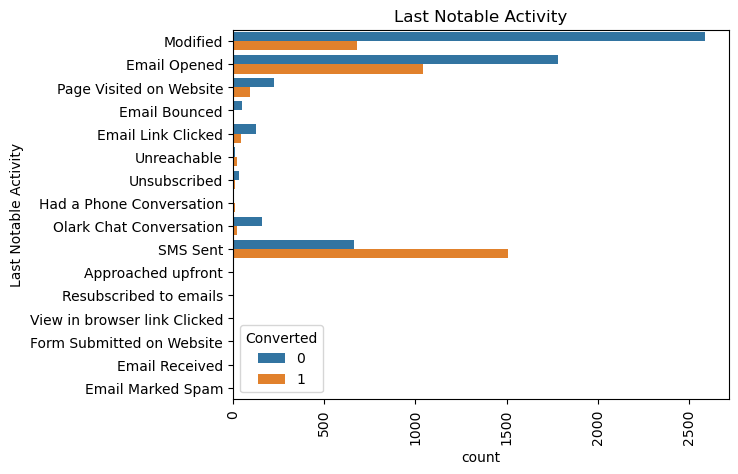

In [63]:
# plotting loops for univariate analysis for categorical variables
for cols in cat_cols:
    #lead_df1[cols].value_counts().sort_values(ascending=True).plot.barh()
    sns.countplot(y=lead_df1[cols],hue=lead_df1.Converted)
    plt.title(cols)
    plt.xticks(rotation=90)
    plt.show()

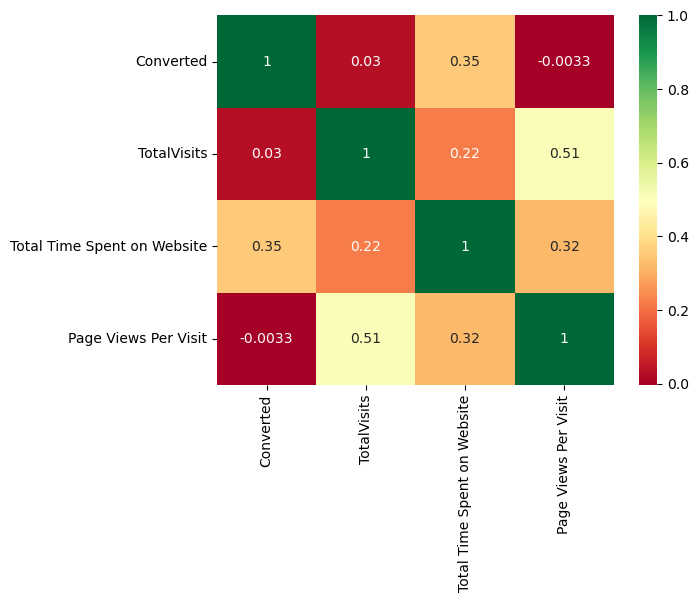

In [64]:
sns.heatmap(lead_df1.corr(),annot=True,cmap='RdYlGn')
plt.show()

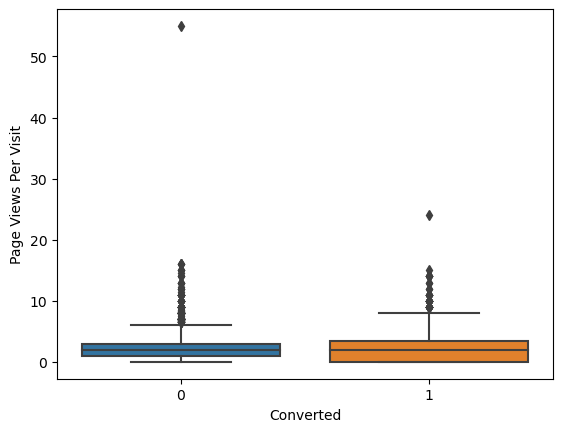

In [65]:
sns.boxplot(x=lead_df1.Converted,y=lead_df1['Page Views Per Visit'])
plt.show()

In [66]:
# Fixing Outliers 

percentiles = lead_df1['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df1['Page Views Per Visit'][lead_df1['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df1['Page Views Per Visit'][lead_df1['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

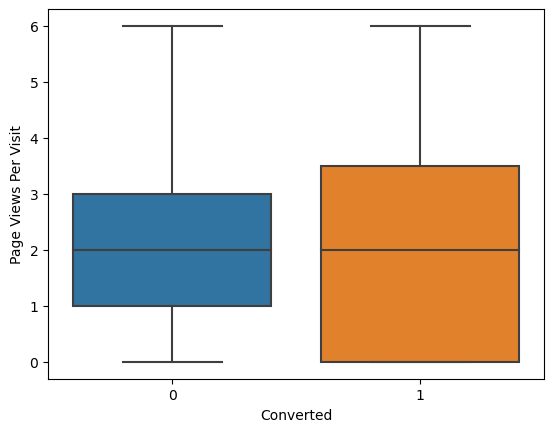

In [67]:
sns.boxplot(x=lead_df1.Converted,y=lead_df1['Page Views Per Visit'])
plt.show()

In [68]:
#Replacing the column value with 0 and 1 
lead_df1['Do Not Email'].replace('No',0,inplace=True)
lead_df1['Do Not Email'].replace('Yes',1,inplace=True)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [70]:
lead_df1_cat=lead_df1[cat_cols]

In [72]:
# Creating dummy variable 

lead_df1_cat=pd.get_dummies(lead_df1_cat,drop_first='first')

In [73]:
lead_df1_cat.shape

(9103, 61)

In [74]:
lead_df1=pd.concat([lead_df1,lead_df1_cat],axis=1)

In [76]:
# We have created dummies for the below variables, so we can drop them

lead_df1.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation',
           'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1,inplace=True)

In [78]:
lead_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 64 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Converted                                             9103 non-null   int64  
 1   TotalVisits                                           9103 non-null   float64
 2   Total Time Spent on Website                           9103 non-null   int64  
 3   Page Views Per Visit                                  9103 non-null   float64
 4   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 5   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 6   Lead Origin_Lead Import                               9103 non-null   uint8  
 7   Lead Source_Direct Traffic                            9103 non-null   uint8  
 8   Lead Source_Facebook                                  9103

Now you can see that you have all variables as numeric.

### Train-test split

In [111]:
from sklearn.model_selection import train_test_split

In [292]:
# Putting feature variables to X and target variable to y

X=lead_df1.drop('Converted',axis=1)
y=lead_df1['Converted']

In [293]:
# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling 

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
scaler = StandardScaler()

X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.fit_transform(X_train[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
7962,-0.092900,1.476324,-0.423364,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
5520,0.695064,-0.771066,2.083179,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0.301082,-0.571257,0.133646,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1566,2.074000,1.393834,0.690655,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9170,-0.683873,-0.881052,-1.258878,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [192]:
### Checking the Conversion Rate
conv = (sum(lead_df1['Converted'])/len(lead_df1['Converted'].index))*100
conv

38.02043282434362

Conversion rate is nearly 38%

### Model Building

#### Running the First Training Model

In [193]:
import statsmodels.api as sm

#### Model 1

In [194]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           59
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2542.9
Date:                Mon, 20 Nov 2023   Deviance:                       5085.7
Time:                        18:58:26   Pearson chi2:                 6.23e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4112
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   21.6240   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              0.2027      0.055      3.701      0.000       0.095       0.310
Total Time Spent on Website                              1.1038      0.041     26.933      0.000       1.024       1.184
Page Views Per Visit                                    -0.1810      0.057     -3.153      0.002      -0.293      -0.068
Lead Origin_Landing Page Submission                     -0.1920      0.109     -1.756      0.079      -0.406       0.022
Lead Origin_Lead Add Form                                3.4880      1.056      3.304      0.001       1.419       5.557
Lead Origin_Lead Import                                  1.2147      1.459      0.832      0.405      -1.646       4.075
Lead Source_Direct Traffic                               1.0801      1.627      0.664      0.507      -2.108       4.268
Lead Source_Facebook                                     0.9373      2.180      0.430      0.667      -3.335       5.210
Lead Source_Google                                       1.4754      1.622      0.909      0.363      -1.705       4.655
Lead Source_Live Chat                                   21.8293   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_NC_EDM                                      25.9268   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Olark Chat                                   2.2953      1.629      1.409      0.159      -0.898       5.489
Lead Source_Organic Search                               1.2422      1.627      0.764      0.445      -1.947       4.431
Lead Source_Pay per Click Ads                          -20.4482   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Press_Release                             2.644e-09   8.84e-06      0.000      1.000   -1.73e-05    1.73e-05
Lead Source_Reference                                    1.2183      1.257      0.969      0.332      -1.245       3.681
Lead Source_Referral Sites                               1.0128      1.662      0.609      0.542      -2.245       4.271
Lead Source_Social Media                                 3.3717      2.192      1.538      0.124      -0.925       7.669
Lead Source_WeLearn                                     24.4803   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             2.9687      1.432      2.073      0.038       0.162       5.776
Lead Source_bing                                       -20.0018   3.76e+04     -0.001      1.000   -7.37e+04    7.36e+04
Lead Source_blog                                       -20

In [195]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [196]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
35,Last Activity_Resubscribed to emails,inf
50,Last Notable Activity_Email Marked Spam,inf
28,Last Activity_Email Marked Spam,inf
58,Last Notable Activity_Resubscribed to emails,inf
55,Last Notable Activity_Modified,1305.13
...,...,...
18,Lead Source_WeLearn,1.24
13,Lead Source_Pay per Click Ads,1.24
10,Lead Source_NC_EDM,1.24
14,Lead Source_Press_Release,NaN


In [197]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop(['Last Activity_Resubscribed to emails','Last Notable Activity_Email Marked Spam','Last Activity_Email Marked Spam','Last Notable Activity_Resubscribed to emails','Last Notable Activity_Modified'], 1)

### Feature Selection Using RFE

In [198]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [199]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [200]:
rfe.support_

array([False,  True, False, False,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False,  True, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
        True,  True, False, False])

In [201]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 25),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 24),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 8),
 ('Lead Source_Facebook', False, 42),
 ('Lead Source_Google', False, 12),
 ('Lead Source_Live Chat', False, 33),
 ('Lead Source_NC_EDM', False, 2),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 11),
 ('Lead Source_Pay per Click Ads', False, 26),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', False, 15),
 ('Lead Source_Referral Sites', False, 10),
 ('Lead Source_Social Media', False, 13),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 9),
 ('Lead Source_blog', False, 29),
 ('Lead Source_testone', False, 28),
 ('Lead Source_welearnblog_Home', False, 34),
 ('Lead Source_youtubechannel', False,

In [202]:
col = X_train.columns[rfe.support_]

In [203]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Others',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_SMS Sent', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [210]:
X_train_rfe=X_train[col]

In [204]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       

##### Assessing the model with StatsModels

#### Model 2

In [205]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.9
Date:                Mon, 20 Nov 2023   Deviance:                       5201.7
Time:                        18:59:23   Pearson chi2:                 6.19e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4004
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1099      0.055    -20.100      0.000      -1.218      -1.002
Total Time Spent on Website                              1.1157      0.040     27.627      0.000       1.037       1.195
Lead Origin_Lead Add Form                                3.6980      0.222     16.622      0.000       3.262       4.134
Lead Origin_Lead Import                                  1.2682      0.446      2.846      0.004       0.395       2.141
Lead Source_Olark Chat                                   1.2901      0.106     12.153      0.000       1.082       1.498
Lead Source_Welingak Website                             1.8502      0.754      2.453      0.014       0.372       3.329
Last Activity_Converted to Lead                         -1.2979      0.213     -6.107      0.000      -1.714      -0.881
Last Activity_Email Bounced                             -1.9731      0.316     -6.251      0.000      -2.592      -1.354
Last Activity_Had a Phone Conversation                   0.5389      0.813      0.663      0.507      -1.054       2.132
Last Activity_Olark Chat Conversation                   -1.3547      0.163     -8.329      0.000      -1.673      -1.036
What is your current occupation_Housewife               22.9992   1.61e+04      0.001      0.999   -3.16e+04    3.17e+04
What is your current occupation_Others                  -1.1337      0.088    -12.888      0.000      -1.306      -0.961
What is your current occupation_Working Professional     2.5429      0.186     13.637      0.000       2.177       2.908
Last Notable Activity_Had a Phone Conversation           2.4868      1.424      1.747      0.081      -0.304       5.277
Last Notable Activity_SMS Sent                           1.3274      0.080     16.684      0.000       1.171       1.483
Last Notable Activity_Unreachable                        1.9090      0.515      3.707      0.000       0.900       2.918
========================================================================================================================
"""

In [211]:
X_train_rfe.drop(["What is your current occupation_Housewife"],1)

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Others,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable
7962,1.476324,0,0,0,0,0,0,0,0,0,0,0,1,0
5520,-0.771066,0,0,0,0,0,0,0,0,0,0,0,0,0
1962,-0.571257,0,0,0,0,0,0,0,0,0,0,0,0,0
1566,1.393834,0,0,0,0,0,0,0,0,0,1,0,0,0
9170,-0.881052,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,0.601932,0,0,0,0,0,0,0,0,1,0,0,0,0
82,-0.881052,0,0,1,0,0,0,0,0,0,1,0,0,0
8173,1.445161,0,0,0,0,0,1,0,0,0,1,0,0,0
7055,-0.754568,0,0,0,0,0,0,0,0,0,1,0,1,0


#### Model 3

In [212]:
X_train_sm = sm.add_constant(X_train_rfe)
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2600.9
Date:                Mon, 20 Nov 2023   Deviance:                       5201.7
Time:                        19:02:25   Pearson chi2:                 6.19e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4004
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1099      0.055    -20.100      0.000      -1.218      -1.002
Total Time Spent on Website                              1.1157      0.040     27.627      0.000       1.037       1.195
Lead Origin_Lead Add Form                                3.6980      0.222     16.622      0.000       3.262       4.134
Lead Origin_Lead Import                                  1.2682      0.446      2.846      0.004       0.395       2.141
Lead Source_Olark Chat                                   1.2901      0.106     12.153      0.000       1.082       1.498
Lead Source_Welingak Website                             1.8502      0.754      2.453      0.014       0.372       3.329
Last Activity_Converted to Lead                         -1.2979      0.213     -6.107      0.000      -1.714      -0.881
Last Activity_Email Bounced                             -1.9731      0.316     -6.251      0.000      -2.592      -1.354
Last Activity_Had a Phone Conversation                   0.5389      0.813      0.663      0.507      -1.054       2.132
Last Activity_Olark Chat Conversation                   -1.3547      0.163     -8.329      0.000      -1.673      -1.036
What is your current occupation_Housewife               22.9992   1.61e+04      0.001      0.999   -3.16e+04    3.17e+04
What is your current occupation_Others                  -1.1337      0.088    -12.888      0.000      -1.306      -0.961
What is your current occupation_Working Professional     2.5429      0.186     13.637      0.000       2.177       2.908
Last Notable Activity_Had a Phone Conversation           2.4868      1.424      1.747      0.081      -0.304       5.277
Last Notable Activity_SMS Sent                           1.3274      0.080     16.684      0.000       1.171       1.483
Last Notable Activity_Unreachable                        1.9090      0.515      3.707      0.000       0.900       2.918
========================================================================================================================
"""

In [216]:
X_train_rfe=X_train_rfe.drop(["What is your current occupation_Housewife"],1)

#### Model 4

In [217]:
X_train_sm = sm.add_constant(X_train_rfe)
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.8
Date:                Mon, 20 Nov 2023   Deviance:                       5213.5
Time:                        19:07:54   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3992
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1007      0.055    -19.993      0.000      -1.209      -0.993
Total Time Spent on Website                              1.1154      0.040     27.649      0.000       1.036       1.194
Lead Origin_Lead Add Form                                3.6978      0.222     16.633      0.000       3.262       4.133
Lead Origin_Lead Import                                  1.2596      0.445      2.828      0.005       0.387       2.133
Lead Source_Olark Chat                                   1.2850      0.106     12.116      0.000       1.077       1.493
Lead Source_Welingak Website                             1.8433      0.754      2.444      0.015       0.365       3.322
Last Activity_Converted to Lead                         -1.3054      0.212     -6.144      0.000      -1.722      -0.889
Last Activity_Email Bounced                             -1.9794      0.316     -6.272      0.000      -2.598      -1.361
Last Activity_Had a Phone Conversation                   0.5301      0.813      0.652      0.514      -1.063       2.123
Last Activity_Olark Chat Conversation                   -1.3589      0.163     -8.356      0.000      -1.678      -1.040
What is your current occupation_Others                  -1.1390      0.088    -12.955      0.000      -1.311      -0.967
What is your current occupation_Working Professional     2.5370      0.186     13.607      0.000       2.172       2.902
Last Notable Activity_Had a Phone Conversation           2.4883      1.424      1.747      0.081      -0.303       5.279
Last Notable Activity_SMS Sent                           1.3201      0.079     16.606      0.000       1.164       1.476
Last Notable Activity_Unreachable                        1.9027      0.515      3.695      0.000       0.893       2.912
========================================================================================================================
"""

In [218]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,Last Activity_Had a Phone Conversation,2.00
11,Last Notable Activity_Had a Phone Conversation,2.00
3,Lead Source_Olark Chat,1.66
1,Lead Origin_Lead Add Form,1.50
8,Last Activity_Olark Chat Conversation,1.40
4,Lead Source_Welingak Website,1.32
9,What is your current occupation_Others,1.28
0,Total Time Spent on Website,1.27
12,Last Notable Activity_SMS Sent,1.19
10,What is your current occupation_Working Profes...,1.15


#### Model 5

In [219]:
X_train_rfe=X_train_rfe.drop(["Last Activity_Had a Phone Conversation"],1)

In [222]:
X_train_sm = sm.add_constant(X_train_rfe)
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.0
Date:                Mon, 20 Nov 2023   Deviance:                       5214.0
Time:                        19:13:07   Pearson chi2:                 6.20e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3992
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0988      0.055    -19.992      0.000      -1.206      -0.991
Total Time Spent on Website                              1.1153      0.040     27.651      0.000       1.036       1.194
Lead Origin_Lead Add Form                                3.6988      0.222     16.638      0.000       3.263       4.135
Lead Origin_Lead Import                                  1.2577      0.445      2.824      0.005       0.385       2.131
Lead Source_Olark Chat                                   1.2839      0.106     12.108      0.000       1.076       1.492
Lead Source_Welingak Website                             1.8407      0.754      2.440      0.015       0.362       3.319
Last Activity_Converted to Lead                         -1.3071      0.212     -6.153      0.000      -1.724      -0.891
Last Activity_Email Bounced                             -1.9809      0.316     -6.277      0.000      -2.599      -1.362
Last Activity_Olark Chat Conversation                   -1.3599      0.163     -8.362      0.000      -1.679      -1.041
What is your current occupation_Others                  -1.1401      0.088    -12.971      0.000      -1.312      -0.968
What is your current occupation_Working Professional     2.5372      0.186     13.610      0.000       2.172       2.903
Last Notable Activity_Had a Phone Conversation           3.0168      1.171      2.576      0.010       0.721       5.312
Last Notable Activity_SMS Sent                           1.3185      0.079     16.594      0.000       1.163       1.474
Last Notable Activity_Unreachable                        1.9013      0.515      3.692      0.000       0.892       2.911
========================================================================================================================
"""

In [221]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Source_Olark Chat,1.65
1,Lead Origin_Lead Add Form,1.50
7,Last Activity_Olark Chat Conversation,1.40
4,Lead Source_Welingak Website,1.32
8,What is your current occupation_Others,1.28
0,Total Time Spent on Website,1.27
11,Last Notable Activity_SMS Sent,1.19
9,What is your current occupation_Working Profes...,1.15
6,Last Activity_Email Bounced,1.03
5,Last Activity_Converted to Lead,1.02


In [223]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.866034
5520    0.123600
1962    0.149832
1566    0.952260
9170    0.310546
5097    0.125905
8954    0.507073
309     0.175994
5519    0.349972
1050    0.536203
dtype: float64

In [224]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.86603433, 0.12359993, 0.14983229, 0.9522601 , 0.31054627,
       0.12590478, 0.50707282, 0.17599375, 0.34997151, 0.53620308])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [225]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.866034,7962
1,0,0.123600,5520
2,0,0.149832,1962
3,1,0.952260,1566
4,0,0.310546,9170


### Finding optimal cut-off point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [227]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.866034,7962,1,1,1,1,1,1,1,1,1,0
1,0,0.123600,5520,1,1,0,0,0,0,0,0,0,0
2,0,0.149832,1962,1,1,0,0,0,0,0,0,0,0
3,1,0.952260,1566,1,1,1,1,1,1,1,1,1,1
4,0,0.310546,9170,1,1,1,1,0,0,0,0,0,0


In [229]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
from sklearn import metrics
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.596359  0.978917  0.362257
0.2   0.2  0.757847  0.909880  0.664812
0.3   0.3  0.787508  0.870194  0.736909
0.4   0.4  0.810891  0.764365  0.839363
0.5   0.5  0.815756  0.694915  0.889704
0.6   0.6  0.809008  0.629186  0.919049
0.7   0.7  0.784526  0.516742  0.948394
0.8   0.8  0.760358  0.418768  0.969390
0.9   0.9  0.713120  0.264572  0.987604


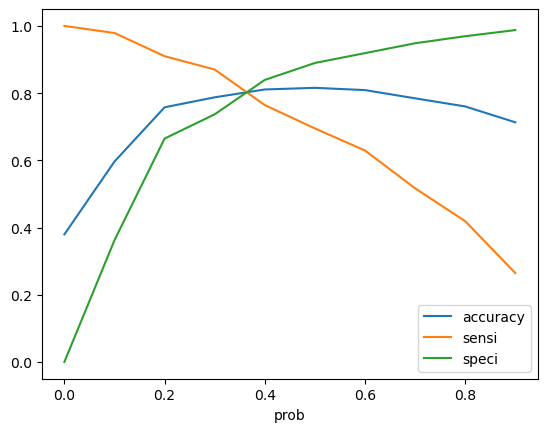

In [232]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability

In [233]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.37 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.866034,7962,1,1,1,1,1,1,1,1,1,0,1
1,0,0.123600,5520,1,1,0,0,0,0,0,0,0,0,0
2,0,0.149832,1962,1,1,0,0,0,0,0,0,0,0,0
3,1,0.952260,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.310546,9170,1,1,1,1,0,0,0,0,0,0,0


### Assigning lead score to the leads based on prediction

In [249]:
# Assigning the 'Lead_Score' based on 'Conversion_Prob'

y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

In [250]:
# Selecting only important columns and displaying head of dataframe:-

y_train_pred_final[['Converted','Conversion_Prob','Prospect ID','final_predicted','Lead_Score']].head()

,Converted,Conversion_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.866034,7962,1,87
1,0,0.123600,5520,0,12
2,0,0.149832,1962,0,15
3,1,0.952260,1566,1,95
4,0,0.310546,9170,0,31


### Model Evaluation

In [235]:
# Let's check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8108913998744507

In [236]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion

array([[3318,  635],
       [ 570, 1849]], dtype=int64)

In [ ]:
#Importing library to plot confusion matrix

from sklearn.metrics import confusion_matrix

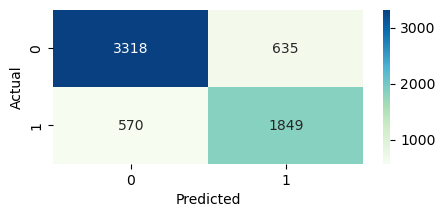

In [259]:
# Plotting confusion matrix
plt.figure(figsize=(5,2))
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=10)
plt.ylabel('Actual',fontsize=10)
plt.show()

In [237]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [238]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7643654402645721

In [239]:
# Let us calculate specificity
TN / float(TN+FP)

0.839362509486466

In [240]:
# Calculate false postive rate - predicting conversion when prospect does not convert
print(FP/ float(TN+FP))

0.16063749051353401


In [241]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7443639291465378


In [242]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8533950617283951


### Precison & Recall

In [245]:
from sklearn.metrics import precision_score, recall_score

##### Precision
TP / TP + FP

In [247]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7443639291465378

##### Recall
TP / TP + FN

In [248]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7643654402645721

We have the following values for the Train Data:

Accuracy : 81%
Sensitivity : 76%
Specificity : 84%
Precision: 74%
Recall: 76%

### Plotting the ROC curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [260]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [261]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

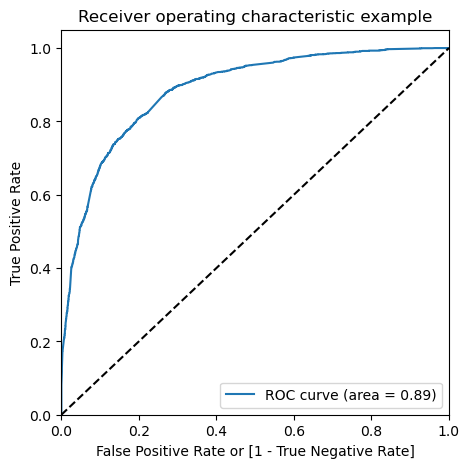

In [262]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

Area under the curve is observed to be 0.89 indicating a good predictive model, since ROC Curve should be a value close to 1.

### Precison & Recall Tradeoff

In [263]:
from sklearn.metrics import precision_recall_curve

In [264]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: Converted, Length: 6372, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       0
        ..
 6367    0
 6368    1
 6369    1
 6370    1
 6371    0
 Name: final_predicted, Length: 6372, dtype: int64)

In [265]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

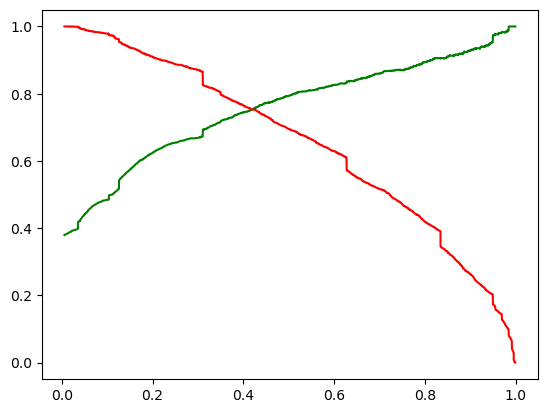

In [266]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

From above above 'precision_recall_curve' we can see that cutoff point is nearly 0.42

Now using this threshold value of 0.42 from 'Precision Recall Tradeoff Curve' for Data Evaluation

In [267]:
# plotting the Train dataset again with 0.42 as cutoff

y_train_pred_final['final_predicted_2'] = y_train_pred_final['Conversion_Prob'].map( lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score,final_predicted_2
0,0,0.866034,7962,1,1,1,1,1,1,1,1,1,0,1,87,1
1,0,0.123600,5520,1,1,0,0,0,0,0,0,0,0,0,12,0
2,0,0.149832,1962,1,1,0,0,0,0,0,0,0,0,0,15,0
3,1,0.952260,1566,1,1,1,1,1,1,1,1,1,1,1,95,1
4,0,0.310546,9170,1,1,1,1,0,0,0,0,0,0,0,31,0


In [268]:
# Let's check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8134023854362837

In [269]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
confusion2

array([[3361,  592],
       [ 597, 1822]], dtype=int64)

In [271]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [272]:
#sensitivity
TP / float(TP+FN)

0.7532038032244729

In [273]:
#specificity
TN / float(TN+FP)

0.8502403238047053

In [274]:
# Calculate false postive rate - predicting conversion when prospect does not convert
print(FP/ float(TN+FP))

0.1497596761952947


In [275]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7547638773819387


In [276]:
# Negative predictive value
print (TN / float(TN+ FN))

0.849166245578575


In [277]:
#precision
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.7547638773819387

In [278]:
#recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.7532038032244729

### Making predictions on the test set

In [294]:
X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]] = scaler.transform(X_test[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3504,-0.092900,-0.103815,0.412150,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4050,-0.683873,-0.881052,-1.258878,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7201,-0.289891,0.424120,-0.144859,1,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1196,0.104091,-0.105648,0.969160,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8219,0.695064,-0.428274,-0.284112,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [296]:
test_col = X_train_rfe.columns

X_test=X_test[test_col[0:]]

# Adding constant variable to test dataframe

X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2731 entries, 3504 to 5826
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 2731 non-null   float64
 1   Total Time Spent on Website                           2731 non-null   float64
 2   Lead Origin_Lead Add Form                             2731 non-null   uint8  
 3   Lead Origin_Lead Import                               2731 non-null   uint8  
 4   Lead Source_Olark Chat                                2731 non-null   uint8  
 5   Lead Source_Welingak Website                          2731 non-null   uint8  
 6   Last Activity_Converted to Lead                       2731 non-null   uint8  
 7   Last Activity_Email Bounced                           2731 non-null   uint8  
 8   Last Activity_Olark Chat Conversation                 2

In [301]:
y_test_pred = res.predict(X_test)

In [302]:
y_test_pred[:10]

3504    0.228896
4050    0.949590
7201    0.666583
1196    0.228535
8219    0.171300
8747    0.125905
9048    0.580226
6524    0.150615
7693    0.386417
8187    0.949590
dtype: float64

In [303]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [304]:
# Let's see the head
y_pred_1.head()

,0
3504,0.228896
4050,0.949590
7201,0.666583
1196,0.228535
8219,0.171300


In [317]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [318]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [319]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [320]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [321]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3504,0.228896
1,1,4050,0.949590
2,0,7201,0.666583
3,0,1196,0.228535
4,1,8219,0.171300


In [322]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [323]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion_Prob'], axis=1)

In [324]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob
0,3504,0,0.228896
1,4050,1,0.949590
2,7201,0,0.666583
3,1196,0,0.228535
4,8219,1,0.171300


In [325]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [326]:
y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))

In [327]:
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,final_predicted,Lead_Score
0,3504,0,0.228896,0,23
1,4050,1,0.949590,1,95
2,7201,0,0.666583,1,67
3,1196,0,0.228535,0,23
4,8219,1,0.171300,0,17


### Test Model Evaluation

In [328]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.809959721713658

In [329]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1386,  303],
       [ 216,  826]], dtype=int64)

In [330]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [331]:
#sesistivity

TP / float(TP+FN)

0.7927063339731286

In [332]:
#specificity

TN / float(TN+FP)

0.8206039076376554

In [333]:
#False Postive Rate
print(FP/ float(TN+FP))

0.17939609236234458


In [334]:
# positive predictive value

print (TP / float(TP+FP))

0.7316209034543845


In [335]:
# Negative predictive value

print (TN / float(TN+ FN))

0.8651685393258427


In [336]:
#precision
precision_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7316209034543845

In [337]:
#recall
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7927063339731286

We have the following values for the Test Data:

Accuracy : 81%
Sensitivity : 79%
Specificity : 82%
Precision: 73%
Recall: 79%

### Determining top features

In [340]:
# Displaying parameters obtained by final model 'logm5':-

pd.options.display.float_format = '{:.2f}'.format # Setting format option
res.params.sort_values(ascending=False)

Lead Origin_Lead Add Form                               3.70
Last Notable Activity_Had a Phone Conversation          3.02
What is your current occupation_Working Professional    2.54
Last Notable Activity_Unreachable                       1.90
Lead Source_Welingak Website                            1.84
Last Notable Activity_SMS Sent                          1.32
Lead Source_Olark Chat                                  1.28
Lead Origin_Lead Import                                 1.26
Total Time Spent on Website                             1.12
const                                                  -1.10
What is your current occupation_Others                 -1.14
Last Activity_Converted to Lead                        -1.31
Last Activity_Olark Chat Conversation                  -1.36
Last Activity_Email Bounced                            -1.98
dtype: float64

In [342]:
top_feature = res.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature.sort_values(ascending=False)

Lead Origin_Lead Add Form                              100.00
Last Notable Activity_Had a Phone Conversation          81.56
What is your current occupation_Working Professional    68.60
Last Notable Activity_Unreachable                       51.40
Lead Source_Welingak Website                            49.77
Last Notable Activity_SMS Sent                          35.65
Lead Source_Olark Chat                                  34.71
Lead Origin_Lead Import                                 34.00
Total Time Spent on Website                             30.15
What is your current occupation_Others                 -30.82
Last Activity_Converted to Lead                        -35.34
Last Activity_Olark Chat Conversation                  -36.77
Last Activity_Email Bounced                            -53.56
dtype: float64

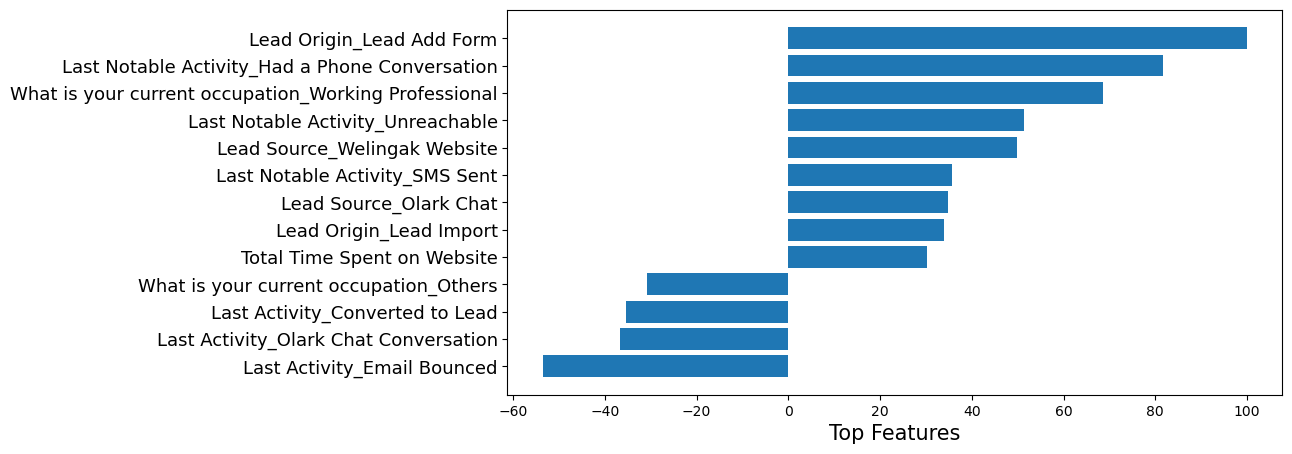

In [344]:
# Plotting the feature variables based on their relative importance:-

top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')

pos = np.arange(top_feature_sort.shape[0]) + .5

fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_rfe.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()